# Machine learning
Formal definition by Tom M. Mitchell:
> A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P, if its performance at tasks in T, as measured by P, improves with experience E.

Machine is not initially (or ever) perfect at performing the given task so the function that the machine comes up with for performing the task is called a **hypothesis function**. Another function is used to train the machine, to improve the hypothesis function. As the machine is training, the performance of each prediction attempt can be measured with a **cost function**.

One simple machine learning model is called Linear regression.

# Linear regression

General form of the hyphothesis function in Linear regression:

$$\hat{y}=h_\theta(x)=\theta_0+\theta_1x$$

Values of $\theta_0$ and $\theta_1$ are modified as the machine learns.

Cost function:

$$J(\theta_0,\theta_1)=\frac{1}{2m}\sum_{i=1}^m(\hat{y}_i-y_i)^2 = \frac{1}{2m}\sum_{i=1}^m(h_\theta(x_i)-y_i)^2$$


# Python implementation
## Univariate linear regression

In [80]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import pandas as pd


### Read test data from a text file

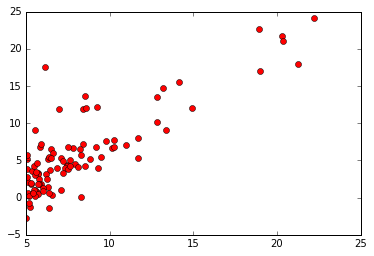

In [141]:
data = pd.read_csv('starter-code/ex1/ex1data1.txt', names=['size','price'])

plt.plot(data['size'].values, data['price'].values, 'ro')
plt.show()

### Initialize variables

In [166]:
# Number of training sets
m = data['price'].size
m

97

In [150]:
# Transform dataframe size column into numpy array
X = data['size'].values
# Transform 1D array into 2D: array([]) -> array([[.,.,.]])
X = X[np.newaxis]
# Transpose to form a column vector: array([[.,.,.]]) -> array([[.],[.],[.]])
X = X.T
# Add ones to first column
X = np.append(np.ones((m,1)), X, axis = 1)
X

array([[  1.    ,   6.1101],
       [  1.    ,   5.5277],
       [  1.    ,   8.5186],
       [  1.    ,   7.0032],
       [  1.    ,   5.8598],
       [  1.    ,   8.3829],
       [  1.    ,   7.4764],
       [  1.    ,   8.5781],
       [  1.    ,   6.4862],
       [  1.    ,   5.0546],
       [  1.    ,   5.7107],
       [  1.    ,  14.164 ],
       [  1.    ,   5.734 ],
       [  1.    ,   8.4084],
       [  1.    ,   5.6407],
       [  1.    ,   5.3794],
       [  1.    ,   6.3654],
       [  1.    ,   5.1301],
       [  1.    ,   6.4296],
       [  1.    ,   7.0708],
       [  1.    ,   6.1891],
       [  1.    ,  20.27  ],
       [  1.    ,   5.4901],
       [  1.    ,   6.3261],
       [  1.    ,   5.5649],
       [  1.    ,  18.945 ],
       [  1.    ,  12.828 ],
       [  1.    ,  10.957 ],
       [  1.    ,  13.176 ],
       [  1.    ,  22.203 ],
       [  1.    ,   5.2524],
       [  1.    ,   6.5894],
       [  1.    ,   9.2482],
       [  1.    ,   5.8918],
       [  1.  

In [144]:
# Set prices to y variable in the same fashion as X
y = data['price'].values[np.newaxis].T
y

array([[ 17.592  ],
       [  9.1302 ],
       [ 13.662  ],
       [ 11.854  ],
       [  6.8233 ],
       [ 11.886  ],
       [  4.3483 ],
       [ 12.     ],
       [  6.5987 ],
       [  3.8166 ],
       [  3.2522 ],
       [ 15.505  ],
       [  3.1551 ],
       [  7.2258 ],
       [  0.71618],
       [  3.5129 ],
       [  5.3048 ],
       [  0.56077],
       [  3.6518 ],
       [  5.3893 ],
       [  3.1386 ],
       [ 21.767  ],
       [  4.263  ],
       [  5.1875 ],
       [  3.0825 ],
       [ 22.638  ],
       [ 13.501  ],
       [  7.0467 ],
       [ 14.692  ],
       [ 24.147  ],
       [ -1.22   ],
       [  5.9966 ],
       [ 12.134  ],
       [  1.8495 ],
       [  6.5426 ],
       [  4.5623 ],
       [  4.1164 ],
       [  3.3928 ],
       [ 10.117  ],
       [  5.4974 ],
       [  0.55657],
       [  3.9115 ],
       [  5.3854 ],
       [  2.4406 ],
       [  6.7318 ],
       [  1.0463 ],
       [  5.1337 ],
       [  1.844  ],
       [  8.0043 ],
       [  1.0179 ],


In [151]:
# Fitting parameters
theta = np.zeros((2,1))
theta

array([[ 0.],
       [ 0.]])

### Define computeCost

In [237]:
def computeCost(X,y,theta,m):
    # octave solution: J = (X*theta-y)'*(X*theta-y)/(2*m);
    xDotThetaSubY = X.dot(theta) - y
    J = xDotThetaSubY.T.dot(xDotThetaSubY) / (2*m)
    
    return J

# Display initial cost
computeCost(X,y,theta,m)

array([[ 32.07273388]])

### Define gradientDescent

In [261]:
def gradientDescent(X, y, theta, alpha, iterations, m, theta_history):
    for i in range (0, iterations):        
        theta = theta - (alpha*X.T).dot(X.dot(theta)-y) / m
        theta_history[i] = computeCost(X, y, theta, m)    
    
    return theta

iterations = 1500;
alpha = 0.01;
theta_history = np.zeros(num_iters)
theta = gradientDescent(X, y, theta, alpha, iterations, m, theta_history)
#theta_history
theta

array([[-3.63029144],
       [ 1.16636235]])

With each iteration of gradien descent we compute the cost of each hyphothesis and save the result in theta_history array, so that we can later see how the gradient descent was performing.

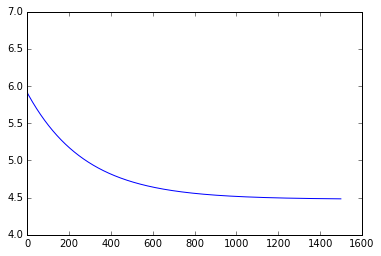

In [240]:
plt.plot(theta_history)
plt.show()

From the graph we can see that the gradient descent has basically reached the minimum at around 1500th iteration: the slope is pretty much flat.

In [266]:
# For population = 35,000, we predict a profit of
print(np.array([1,3.5]).dot(theta) * 10000)

# For population = 35,000, we predict a profit of
print(np.array([1,7]).dot(theta) * 10000)

[ 4519.7678677]
[ 45342.45012945]
